# SCC-ICMC-USP - 2º Semestre de 2023
## SCC0275 - Introdução à Ciência de Dados
### Professora: Roseli A. F. Romero
### Monitor: Roseval Malaquias Jr

### **Exercício 4**

**Número do Grupo:** 16

**Alunos:**
1. Renan de Almeida Leandro - 11801157
2. Gabriel de Avelar Las Casas Rebelo - 11800462

Nesta atividade, nosso objetivo é exercitar os seguintes conceitos:
- Manuseio e exploração de datasets utilizando a biblioteca `pandas`;
- Utilização de métodos de imputação de valores faltantes com a biblioteca `scikit-learn`;
- Transformação de variáveis utilizando a biblioteca `scikit-learn`;
- Aplicação do método PCA utilizando a biblioteca `scikit-learn`.

---

Para os exercícios de **1** a **5**, utilizaremos o dataset **titanic.csv**. A célula de código a seguir realizará o download deste dataset para o ambiente virtual do Google Colab.


In [1]:
# Download do dataset para o ambiente virtual.
!wget -O titanic.csv "https://drive.google.com/uc?export=download&id=1agkXL_AlnzqjrPKIPwJy01Bkh17GUW-3"

--2024-01-14 15:40:52--  https://drive.google.com/uc?export=download&id=1agkXL_AlnzqjrPKIPwJy01Bkh17GUW-3
Resolving drive.google.com (drive.google.com)... 142.250.107.139, 142.250.107.113, 142.250.107.100, ...
Connecting to drive.google.com (drive.google.com)|142.250.107.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1agkXL_AlnzqjrPKIPwJy01Bkh17GUW-3&export=download [following]
--2024-01-14 15:40:52--  https://drive.usercontent.google.com/download?id=1agkXL_AlnzqjrPKIPwJy01Bkh17GUW-3&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.99.132, 2607:f8b0:400e:c0c::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.99.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [application/octet-stream]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  59.76K  --.-KB/s  

## Dataset **titanic.csv**

---
### Questão 01.

Carregue o dataset **titanic.csv** (`pandas.read_csv`) e interprete os valores ausentes corretamente. Utilize o parâmetro `na_values='?'`.

In [2]:
# Imports
import pandas as pd
titanic = pd.read_csv('titanic.csv', na_values='?')
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


---
### Questão 02.
Realize uma análise exploratória inicial do dataset fornecido.

Para isso, você deve:

 - Apresente a quantidade de valores faltantes para cada variável do dataset.


In [4]:
# 1. Quantidade de valores faltantes para cada variável
missing_values = titanic.isnull().sum()

# 2. Identificar o tipo de dado de cada variável
data_types = titanic.dtypes

# Exibindo os resultados
print("1. Quantidade de Valores Faltantes:")
print(missing_values)
print("\n2. Tipos de Dados das Variáveis:")
print(data_types)

1. Quantidade de Valores Faltantes:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

2. Tipos de Dados das Variáveis:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object




---

### Questão 03.

Realize o pré-processamento do dataset fornecido.

Para isso, você deve:


-   **Para as variáveis numéricas:** substitua os valores faltantes utilizando a estratégia de **mediana** (`sklearn.impute.SimpleImputer`). Depois, **padronize** as variáveis (`sklearn.preprocessing.StandarScaler`).
-   **Para as variáveis categóricas:** substitua os valores faltantes utilizando a estratégia de **mais frequentes** (`sklearn.impute.SimpleImputer`). Depois, converta os dados categóricos para uma representação numérica, utilizando a codificação **Label Encoding** (`sklearn.preprocessing.LabelEncoder`).

Por fim, apresente os resultados, comprovando que a imputação e transformações foram feitas corretamente.

In [5]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

titanic_copy = titanic.copy()

In [6]:
# Selecionando as variáveis numéricas
numeric_variables = ['Age', 'SibSp', 'Parch', 'Fare']

# Criando um SimpleImputer com estratégia de substituição pela mediana
imputerNumerical = SimpleImputer(strategy='median')

# Aplicando a transformação nas variáveis numéricas
titanic_copy[numeric_variables] = imputerNumerical.fit_transform(titanic_copy[numeric_variables])

# Criando um StandardScaler para padronizar as variáveis
scaler = StandardScaler()

# Aplicando o StandardScaler nas variáveis numéricas
titanic_copy[numeric_variables] = scaler.fit_transform(titanic_copy[numeric_variables])

# Verificando se ainda existem valores faltantes (não deveria haver, pois foram imputados)
missing_values_after_imputation = titanic_copy[numeric_variables].isnull().sum()

# Exibindo os resultados
print("Quantidade de Valores Faltantes Após Imputação:")
print(missing_values_after_imputation)

Quantidade de Valores Faltantes Após Imputação:
Age      0
SibSp    0
Parch    0
Fare     0
dtype: int64


In [7]:
# Selecionando as variáveis categóricas
categorical_variables = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

# Criando um SimpleImputer com estratégia de substituição pela mais frequente
imputerCategorical = SimpleImputer(strategy='most_frequent')

# Aplicando a transformação nas variáveis categóricas
titanic_copy[categorical_variables] = imputerCategorical.fit_transform(titanic_copy[categorical_variables])

# Criando um LabelEncoder para codificar as variáveis categóricas
label_encoder = LabelEncoder()

# Aplicando o LabelEncoder nas variáveis categóricas
for var in categorical_variables:
    titanic_copy[var] = label_encoder.fit_transform(titanic_copy[var])

# Verificando se ainda existem valores faltantes
missing_values_after_imputation = titanic_copy[categorical_variables].isnull().sum()

# Exibindo os resultados
print("Quantidade de Valores Faltantes Após Imputação:")
print(missing_values_after_imputation)

Quantidade de Valores Faltantes Após Imputação:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Ticket         0
Cabin          0
Embarked       0
dtype: int64




---

### Questão 04.

- Separe a variável ``Survived`` do dataframe resultante.

- Para o restante do dataframe, reduza o número de variáveis explicativas para 2 dimensões, utilizando a técnica PCA (`sklearn.decomposition.PCA`).

- Plote um gráfico bidimensional dos pontos após a redução, colorindo cada ponto com o valor do atributo ``Survived``para aquele ponto.

- Discuta a interpretação dos componentes principais.

> **Faça uma cópia do dataframe resultante da questão 03, pois ele será utilizado na próxima questão**

In [8]:
# Separando a variável 'Survived'
survived = titanic_copy['Survived']
df_minus_survived = titanic_copy.drop(columns=['Survived'])

In [9]:
from sklearn.decomposition import PCA

# Selecionando as variáveis explicativas
X = df_minus_survived.drop(columns = ['PassengerId', 'Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'])

# Criando uma instância de PCA para 2 componentes
pca = PCA(n_components=2)

# Aplicando a redução de dimensionalidade
X_pca = pca.fit_transform(X)


In [10]:
pca.components_

array([[-0.3538236 ,  0.6235585 ,  0.62019048,  0.31835111],
       [ 0.68345782, -0.06944311,  0.08956957,  0.72113823]])

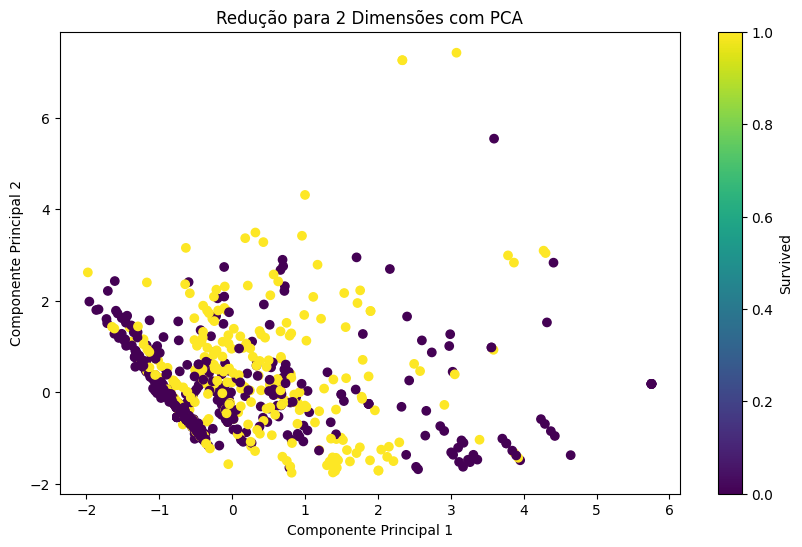

In [11]:
import matplotlib.pyplot as plt

# Criando um DataFrame com os dados reduzidos pelo PCA
pca_df = pd.DataFrame(data=X_pca, columns=['Componente Principal 1', 'Componente Principal 2'])

# Adicionando a coluna 'Survived' ao DataFrame PCA
pca_df['Survived'] = survived

# Criando o gráfico
plt.figure(figsize=(10, 6))
plt.scatter(x=pca_df['Componente Principal 1'], y=pca_df['Componente Principal 2'], c=pca_df['Survived'], cmap='viridis')
plt.colorbar(label='Survived')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Redução para 2 Dimensões com PCA')
plt.show()

Os componentes principais são combinações lineares das variáveis originais que capturam a maior parte da variabilidade nos dados. No caso do PCA, o primeiro componente principal (PC1) captura a maior variância e o segundo componente principal (PC2) captura a segunda maior variância.

A interpretação dos componentes principais depende das características específicas do conjunto de dados. No entanto, em termos gerais, os componentes principais podem representar padrões ou relações importantes entre as variáveis originais.



---

### Questão 05.

**Para o dataframe resultante da questão 03:**
- Reduza a dimensionalidade do conjunto de dados criado utilizando a técnica PCA (`sklearn.decomposition.PCA`). Reduza a dimensionalidade de forma que no mínimo 80% da variância dos dados seja mantida. Depois apresente os eixos principais.

In [12]:
# Selecionando as variáveis explicativas
Y = titanic_copy.drop(columns = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'])

# Criando uma instância de PCA para 80% da variância dos dados
pca_80 = PCA(0.8, svd_solver='full')

# Aplicando a redução de dimensionalidade
X_pca_80 = pca_80.fit_transform(Y)

print(pca_80.components_)

[[-0.3538236   0.6235585   0.62019048  0.31835111]
 [ 0.68345782 -0.06944311  0.08956957  0.72113823]
 [-0.63152602 -0.31855316 -0.35406686  0.61182957]]
